##Data Loading and Extraction

https://physionet.org/content/mimic2-iaccd/1.0/

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from scipy.stats import entropy

print("TensorFlow version:", tf.__version__)
print("Eager execution:", tf.executing_eagerly())

TensorFlow version: 2.18.0
Eager execution: True


In [ ]:
!wget -r -N -c -np https://physionet.org/files/mimic2-iaccd/1.0/

--2025-04-18 21:43:04--  https://physionet.org/files/mimic2-iaccd/1.0/
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘physionet.org/files/mimic2-iaccd/1.0/index.html’

physionet.org/files     [ <=>                ]     835  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2025-04-18 21:43:04 (134 MB/s) - ‘physionet.org/files/mimic2-iaccd/1.0/index.html’ saved [835]

Loading robots.txt; please ignore errors.
--2025-04-18 21:43:04--  https://physionet.org/robots.txt
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK

    The file is already fully retrieved; nothing to do.

--2025-04-18 21:43:04--  https://physionet.org/files/mimic2-iaccd/1.0/LICENSE.txt
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response..

In [ ]:
import os

data_dir = '/content/physionet.org/files/mimic2-iaccd/1.0/'

In [ ]:
print(os.listdir(data_dir))

['SHA256SUMS.txt', 'aline-mimic-ii-master.zip', 'LICENSE.txt', 'full_cohort_data.csv', 'data_dictionary.txt', 'index.html']


In [ ]:
data = pd.read_csv(data_dir + 'full_cohort_data.csv')

In [ ]:
data.head()

,aline_flg,icu_los_day,hospital_los_day,age,gender_num,weight_first,bmi,sapsi_first,sofa_first,service_unit,...,platelet_first,sodium_first,potassium_first,tco2_first,chloride_first,bun_first,creatinine_first,po2_first,pco2_first,iv_day_1
0,1,7.63,13,72.36841,1.0,75.0,29.912791,15.0,9.0,SICU,...,354.0,138.0,4.6,15.0,109.0,41.0,1.6,196.0,39.0,2230.875000
1,0,1.14,1,64.92076,0.0,55.0,20.121312,NaN,5.0,MICU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600.000000
2,0,2.86,5,36.50000,0.0,70.0,27.118272,16.0,5.0,MICU,...,295.0,144.0,3.9,17.0,101.0,16.0,0.8,298.0,30.0,2086.800293
3,1,0.58,3,44.49191,0.0,NaN,NaN,21.0,7.0,SICU,...,262.0,139.0,4.2,31.0,100.0,16.0,0.5,146.0,23.0,NaN
4,1,1.75,5,23.74217,1.0,95.2,28.464563,18.0,7.0,SICU,...,22.0,146.0,3.4,19.0,110.0,10.0,1.0,134.0,30.0,2358.244141


In [ ]:
print(data.shape)

(1776, 46)


In [ ]:
data.columns

Index(['aline_flg', 'icu_los_day', 'hospital_los_day', 'age', 'gender_num',
       'weight_first', 'bmi', 'sapsi_first', 'sofa_first', 'service_unit',
       'service_num', 'day_icu_intime', 'day_icu_intime_num',
       'hour_icu_intime', 'hosp_exp_flg', 'icu_exp_flg', 'day_28_flg',
       'mort_day_censored', 'censor_flg', 'sepsis_flg', 'chf_flg', 'afib_flg',
       'renal_flg', 'liver_flg', 'copd_flg', 'cad_flg', 'stroke_flg',
       'mal_flg', 'resp_flg', 'map_1st', 'hr_1st', 'temp_1st', 'spo2_1st',
       'abg_count', 'wbc_first', 'hgb_first', 'platelet_first', 'sodium_first',
       'potassium_first', 'tco2_first', 'chloride_first', 'bun_first',
       'creatinine_first', 'po2_first', 'pco2_first', 'iv_day_1'],
      dtype='object')

In [ ]:
print(data.dtypes)

aline_flg               int64
icu_los_day           float64
hospital_los_day        int64
age                   float64
gender_num            float64
weight_first          float64
bmi                   float64
sapsi_first           float64
sofa_first            float64
service_unit           object
service_num             int64
day_icu_intime         object
day_icu_intime_num      int64
hour_icu_intime         int64
hosp_exp_flg            int64
icu_exp_flg             int64
day_28_flg              int64
mort_day_censored     float64
censor_flg              int64
sepsis_flg              int64
chf_flg                 int64
afib_flg                int64
renal_flg               int64
liver_flg               int64
copd_flg                int64
cad_flg                 int64
stroke_flg              int64
mal_flg                 int64
resp_flg                int64
map_1st               float64
hr_1st                  int64
temp_1st              float64
spo2_1st                int64
abg_count 

This dataset represents clinical data from 1,776 patients who were primarily admitted to the ICU (Intensive Care Unit) due to respiratory failure and were hemodynamically stable (blood pressure and heart rate are stable).

For reference:
- SAPS-I (Simplified Acute Physiology Score) - Score asses the severity of a patient's condtion based on physiological measurements.

- SOFA (Sequential Organ Failure Assessment) - Evaluates extent of a patients organ function or rate of failure.

In this case, we are trying to predict for day_28_flg. 1 = Died within 28 days of ICU admission, 0 = Survived

In [ ]:
data.describe()

,aline_flg,icu_los_day,hospital_los_day,age,gender_num,weight_first,bmi,sapsi_first,sofa_first,service_num,...,platelet_first,sodium_first,potassium_first,tco2_first,chloride_first,bun_first,creatinine_first,po2_first,pco2_first,iv_day_1
count,1776.000000,1776.000000,1776.000000,1776.000000,1775.000000,1666.000000,1310.000000,1691.000000,1770.000000,1776.000000,...,1768.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1770.000000,1590.000000,1590.000000,1633.000000
mean,0.554054,3.346498,8.110923,54.379660,0.577465,80.075948,27.827316,14.136606,5.820904,0.552928,...,246.083145,139.559006,4.107623,24.416657,103.839074,19.277809,1.095706,227.623270,43.413836,1622.907946
std,0.497210,3.356261,8.157159,21.062854,0.494102,22.490516,8.210074,4.114302,2.334666,0.497331,...,99.865469,4.726209,0.794724,4.992172,5.734283,14.366890,1.083477,144.863403,13.980786,1677.129157
min,0.000000,0.500000,1.000000,15.180230,0.000000,30.000000,12.784877,3.000000,0.000000,0.000000,...,7.000000,105.000000,1.900000,2.000000,78.000000,2.000000,0.000000,22.000000,8.000000,0.000000
25%,0.000000,1.370000,3.000000,38.247318,0.000000,65.400000,22.617307,11.000000,4.000000,0.000000,...,182.000000,137.000000,3.600000,22.000000,101.000000,11.000000,0.700000,108.000000,36.000000,329.750000
50%,1.000000,2.185000,6.000000,53.678585,1.000000,77.000000,26.324846,14.000000,6.000000,1.000000,...,239.000000,140.000000,4.000000,24.000000,104.000000,15.000000,0.900000,195.000000,41.000000,1081.529175
75%,1.000000,4.002500,10.000000,72.762992,1.000000,90.000000,30.796551,17.000000,7.000000,1.000000,...,297.000000,142.000000,4.400000,27.000000,107.000000,22.000000,1.100000,323.000000,47.000000,2493.900146
max,1.000000,28.240000,112.000000,99.110950,1.000000,257.600000,98.797134,32.000000,17.000000,1.000000,...,988.000000,165.000000,9.800000,62.000000,133.000000,139.000000,18.300000,634.000000,158.000000,13910.000000


In [ ]:
print(data.isnull().sum())

aline_flg               0
icu_los_day             0
hospital_los_day        0
age                     0
gender_num              1
weight_first          110
bmi                   466
sapsi_first            85
sofa_first              6
service_unit            0
service_num             0
day_icu_intime          0
day_icu_intime_num      0
hour_icu_intime         0
hosp_exp_flg            0
icu_exp_flg             0
day_28_flg              0
mort_day_censored       0
censor_flg              0
sepsis_flg              0
chf_flg                 0
afib_flg                0
renal_flg               0
liver_flg               0
copd_flg                0
cad_flg                 0
stroke_flg              0
mal_flg                 0
resp_flg                0
map_1st                 0
hr_1st                  0
temp_1st                3
spo2_1st                0
abg_count               0
wbc_first               8
hgb_first               8
platelet_first          8
sodium_first            5
potassium_fi

##Data Preprocessing, Feature Engineering, Visualization

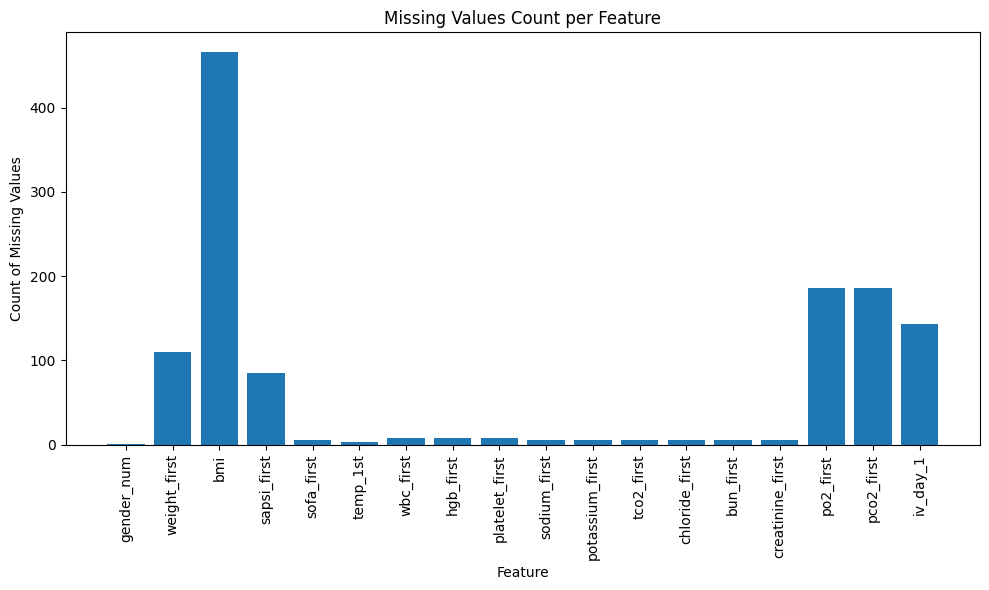

In [ ]:
missing_counts = data.isnull().sum()
missing_counts = missing_counts[missing_counts > 0] #only show featues with missing values
if not missing_counts.empty:
    plt.figure(figsize=(10, 6))
    plt.bar(missing_counts.index, missing_counts.values)
    plt.xticks(rotation=90)
    plt.title("Missing Values Count per Feature")
    plt.xlabel("Feature")
    plt.ylabel("Count of Missing Values")
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found.")

Now, the goal is compute the feature relevance to day_28_flg

In [ ]:
df = data
#encoding non-numerical columns to numerical

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['day_icu_intime'] = label_encoder.fit_transform(df['day_icu_intime'])

In [ ]:
print(df['service_unit'].unique())

['SICU' 'MICU' 'FICU']


In [ ]:
print((df['day_icu_intime'].unique()))

[0 2 3 4 6 1 5]


In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

#Exclude the label from the list if it's present
if 'day_28_flg' in numeric_cols:
    numeric_cols.remove('day_28_flg')

correlations = {}
for col in numeric_cols:
    correlations[col] = df[col].corr(df['day_28_flg'])

#Create a DataFrame for correlations
corr_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])
corr_df = corr_df.sort_values(by='Correlation', key=abs, ascending=False)

print("\nCorrelation of Numeric Features with day_28_flg:")
print(corr_df)


Correlation of Numeric Features with day_28_flg:
               Feature  Correlation
13        hosp_exp_flg     0.903241
14         icu_exp_flg     0.747289
16          censor_flg    -0.698426
15   mort_day_censored    -0.657115
3                  age     0.392159
24          stroke_flg     0.370397
7          sapsi_first     0.321747
19            afib_flg     0.254170
39           bun_first     0.210879
18             chf_flg     0.161281
8           sofa_first     0.146692
5         weight_first    -0.143398
26            resp_flg     0.125416
33           hgb_first    -0.123492
6                  bmi    -0.096576
43            iv_day_1    -0.096212
38      chloride_first    -0.095193
2     hospital_los_day    -0.090815
22            copd_flg     0.086615
23             cad_flg     0.081198
1          icu_los_day     0.081197
31           abg_count     0.076426
4           gender_num    -0.076088
25             mal_flg     0.070988
41           po2_first    -0.058755
37          tc

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Here, we are using Pearson correlation coefficient which is scale-invariant. It internally standardizes the variables and therefore we can get the true correlation even if the feature scales are different. Another note is that this correlation is capturing the linear relationship between variables.

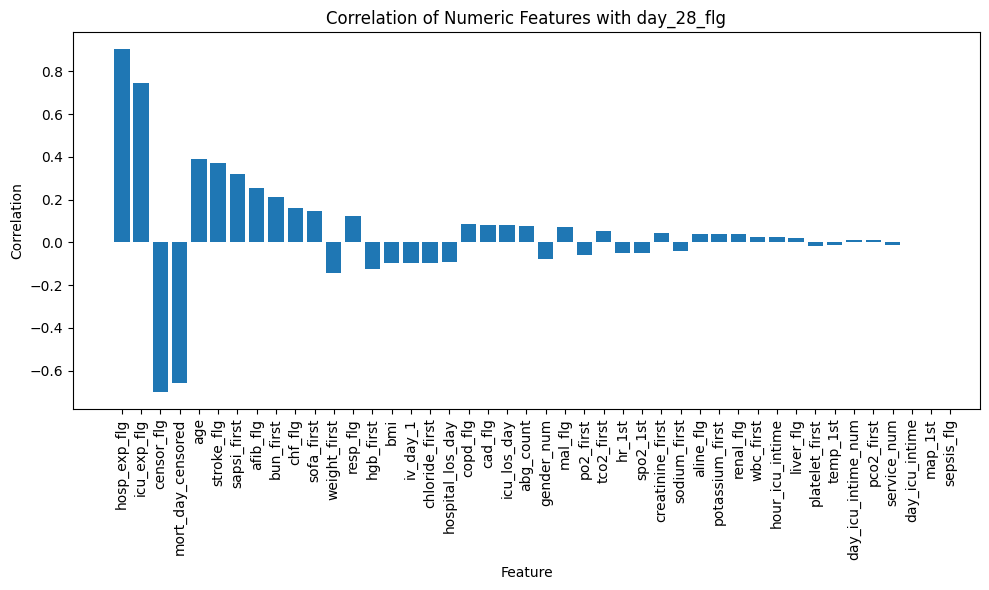

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(corr_df['Feature'], corr_df['Correlation'])
plt.xticks(rotation=90)
plt.title("Correlation of Numeric Features with day_28_flg")
plt.xlabel("Feature")
plt.ylabel("Correlation")
plt.tight_layout()
plt.show()

In [ ]:
corr_df = corr_df.sort_values(by='Correlation', key=abs, ascending=False)
N = 5
top_N_features = corr_df.head(N)
print(top_N_features)

              Feature  Correlation
13       hosp_exp_flg     0.903241
14        icu_exp_flg     0.747289
16         censor_flg    -0.698426
15  mort_day_censored    -0.657115
3                 age     0.392159


In [ ]:
#data cleaning
features_to_drop = [
    'mort_day_censored',     #time to death/censoring (leakage)
    'hosp_exp_flg',          #hospital mortality (outcome leakage)
    'icu_exp_flg',           #ICU mortality (outcome leakage)
    'censor_flg',            #death vs censored (labels)
    'icu_los_day',           #length of ICU stay (post-outcome)
    'hospital_los_day',      #hospital LOS (post-outcome)
    'day_icu_intime',        #redundant with day_icu_intime_num
    'service_unit',          #redundant with service_num
    'sepsis_flg'             #uninformative (all 0s)
]

df_cleaned = df.drop(columns=features_to_drop)
print("Dropped leakage, redundant, and uninformative features.")

Dropped leakage, redundant, and uninformative features.


In [ ]:
df_cleaned.head()

,aline_flg,age,gender_num,weight_first,bmi,sapsi_first,sofa_first,service_num,day_icu_intime_num,hour_icu_intime,...,platelet_first,sodium_first,potassium_first,tco2_first,chloride_first,bun_first,creatinine_first,po2_first,pco2_first,iv_day_1
0,1,72.36841,1.0,75.0,29.912791,15.0,9.0,1,6,6,...,354.0,138.0,4.6,15.0,109.0,41.0,1.6,196.0,39.0,2230.875000
1,0,64.92076,0.0,55.0,20.121312,NaN,5.0,0,7,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600.000000
2,0,36.50000,0.0,70.0,27.118272,16.0,5.0,0,6,3,...,295.0,144.0,3.9,17.0,101.0,16.0,0.8,298.0,30.0,2086.800293
3,1,44.49191,0.0,NaN,NaN,21.0,7.0,1,7,4,...,262.0,139.0,4.2,31.0,100.0,16.0,0.5,146.0,23.0,NaN
4,1,23.74217,1.0,95.2,28.464563,18.0,7.0,1,7,7,...,22.0,146.0,3.4,19.0,110.0,10.0,1.0,134.0,30.0,2358.244141


In [ ]:
df_cleaned['day_28_flg'].value_counts()

,count
day_28_flg,
0,1493
1,283


In [ ]:
#data split
X = df_cleaned.drop('day_28_flg', axis=1)
y = df_cleaned['day_28_flg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)

In [ ]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [ ]:
df_train.head()

,aline_flg,age,gender_num,weight_first,bmi,sapsi_first,sofa_first,service_num,day_icu_intime_num,hour_icu_intime,...,sodium_first,potassium_first,tco2_first,chloride_first,bun_first,creatinine_first,po2_first,pco2_first,iv_day_1,day_28_flg
1017,0,84.09868,0.0,68.8,24.481224,NaN,3.0,1,1,22,...,138.0,4.3,34.0,98.0,30.0,0.9,NaN,NaN,1725.000000,0
286,0,72.91011,0.0,92.4,32.878854,14.0,2.0,0,6,18,...,141.0,4.0,32.0,98.0,28.0,0.7,214.0,48.0,200.000000,0
742,1,58.18815,0.0,108.0,46.500093,17.0,6.0,1,3,4,...,127.0,4.5,24.0,91.0,26.0,1.3,126.0,41.0,NaN,0
784,1,32.01023,1.0,88.7,27.543890,17.0,4.0,1,7,0,...,140.0,9.2,19.0,108.0,20.0,1.3,498.0,46.0,3123.056885,0
372,1,86.29471,0.0,56.8,22.081962,18.0,4.0,1,5,20,...,131.0,3.5,17.0,99.0,12.0,0.4,141.0,26.0,3618.399902,0


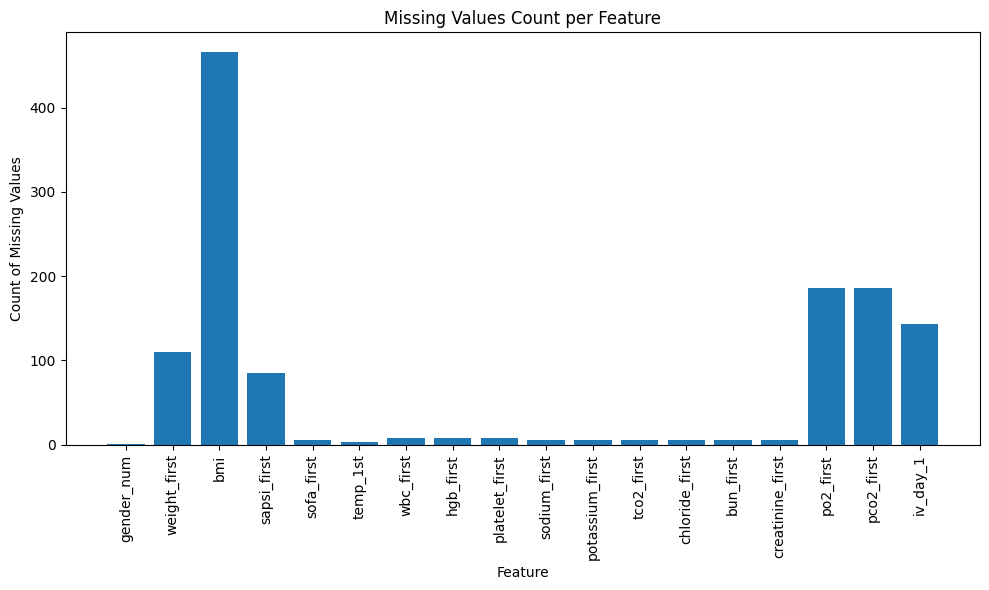

In [ ]:
missing_counts = df_cleaned.isnull().sum()
missing_counts = missing_counts[missing_counts > 0] #only show featues with missing values
if not missing_counts.empty:
    plt.figure(figsize=(10, 6))
    plt.bar(missing_counts.index, missing_counts.values)
    plt.xticks(rotation=90)
    plt.title("Missing Values Count per Feature")
    plt.xlabel("Feature")
    plt.ylabel("Count of Missing Values")
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found.")

In [ ]:
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
print(num_cols)

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

#a pipeline for numerical features: impute missing values then scale
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


['aline_flg', 'age', 'gender_num', 'weight_first', 'bmi', 'sapsi_first', 'sofa_first', 'service_num', 'day_icu_intime_num', 'hour_icu_intime', 'chf_flg', 'afib_flg', 'renal_flg', 'liver_flg', 'copd_flg', 'cad_flg', 'stroke_flg', 'mal_flg', 'resp_flg', 'map_1st', 'hr_1st', 'temp_1st', 'spo2_1st', 'abg_count', 'wbc_first', 'hgb_first', 'platelet_first', 'sodium_first', 'potassium_first', 'tco2_first', 'chloride_first', 'bun_first', 'creatinine_first', 'po2_first', 'pco2_first', 'iv_day_1']


In [ ]:
#Fit the pipeline on training data and transform both train and test
X_train_processed = pd.DataFrame(
    num_pipeline.fit_transform(X_train[num_cols]),
    columns=num_cols,
    index=X_train.index
)
X_test_processed = pd.DataFrame(
    num_pipeline.transform(X_test[num_cols]),
    columns=num_cols,
    index=X_test.index
)

##Testing out GANs

In [ ]:
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam


In [ ]:
!pip install opacus

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 1. Prepare for conditional GAN (cGAN)
noise_dim    = 32
num_classes  = 2
feature_dim  = X_train_processed.shape[1]

y_train_ohe  = tf.one_hot(y_train.values, depth=num_classes)
y_test_ohe   = tf.one_hot(y_test.values, depth=num_classes)

# 2. Define generator and discriminator factories
def make_generator(noise_dim, num_classes, output_dim):
    return keras.Sequential([
        layers.Input(shape=(noise_dim + num_classes,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(output_dim)
    ], name='generator')

def make_discriminator(input_dim, num_classes):
    return keras.Sequential([
        layers.Input(shape=(input_dim + num_classes,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(1)
    ], name='discriminator')

generator     = make_generator(noise_dim, num_classes, feature_dim)
discriminator = make_discriminator(feature_dim, num_classes)

# 3. Use standard Adam optimizers (no DP)
gen_optimizer  = Adam(learning_rate=2e-4, beta_1=0.5)
disc_optimizer = Adam(learning_rate=2e-4, beta_1=0.5)

# 4. Loss functions
bce = keras.losses.BinaryCrossentropy(
    from_logits=True,
    reduction=tf.losses.Reduction.NONE
)

def discriminator_loss(real_logits, fake_logits):
    real_loss = bce(tf.ones_like(real_logits),  real_logits)
    fake_loss = bce(tf.zeros_like(fake_logits), fake_logits)
    return tf.reduce_mean(real_loss + fake_loss)

def generator_loss(fake_logits):
    loss = bce(tf.ones_like(fake_logits), fake_logits)
    return tf.reduce_mean(loss)

# 5. Prepare the tf.data pipeline
batch_size = 64
dataset = tf.data.Dataset.from_tensor_slices(
    (X_train_processed.values.astype('float32'), y_train_ohe)
).shuffle(1024).batch(batch_size)

# 6. Training loop
epochs = 100
for epoch in range(epochs):
    for real_features, real_labels in dataset:
        # figure out how many samples are in this batch
        current_bs = tf.shape(real_features)[0]

        # — Train discriminator —
        noise = tf.random.normal([current_bs, noise_dim])
        rnd_idx = tf.random.uniform([current_bs], 0, num_classes, dtype=tf.int32)
        random_labels = tf.one_hot(rnd_idx, depth=num_classes)

        gen_input     = tf.concat([noise, random_labels], axis=1)
        fake_features = generator(gen_input, training=True)

        with tf.GradientTape() as disc_tape:
            real_input  = tf.concat([real_features, real_labels], axis=1)
            fake_input  = tf.concat([fake_features, random_labels], axis=1)

            real_logits = discriminator(real_input, training=True)
            fake_logits = discriminator(fake_input, training=True)

            d_loss      = discriminator_loss(real_logits, fake_logits)

        grads_d = disc_tape.gradient(d_loss, discriminator.trainable_variables)
        disc_optimizer.apply_gradients(
            zip(grads_d, discriminator.trainable_variables)
        )

        # — Train generator —
        noise = tf.random.normal([current_bs, noise_dim])
        rnd_idx = tf.random.uniform([current_bs], 0, num_classes, dtype=tf.int32)
        random_labels = tf.one_hot(rnd_idx, depth=num_classes)

        with tf.GradientTape() as gen_tape:
            gen_input    = tf.concat([noise, random_labels], axis=1)
            fake_features = generator(gen_input, training=True)
            fake_input    = tf.concat([fake_features, random_labels], axis=1)
            fake_logits   = discriminator(fake_input, training=True)

            g_loss = generator_loss(fake_logits)

        grads_g = gen_tape.gradient(g_loss, generator.trainable_variables)
        gen_optimizer.apply_gradients(
            zip(grads_g, generator.trainable_variables)
        )

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}  Disc Loss: {d_loss:.4f}  Gen Loss: {g_loss:.4f}")

# 7. Generate balanced synthetic data
num_synth = X_train_processed.shape[0]
noise     = tf.random.normal([num_synth, noise_dim])
labels    = tf.concat([
    tf.one_hot(np.zeros(num_synth//2, dtype=int), depth=num_classes),
    tf.one_hot(np.ones( num_synth - num_synth//2, dtype=int), depth=num_classes)
], axis=0)

gen_input      = tf.concat([noise, labels], axis=1)
synth_features = generator(gen_input, training=False).numpy()
synth_df       = pd.DataFrame(synth_features, columns=X_train_processed.columns)
synth_labels   = np.concatenate([np.zeros(num_synth//2), np.ones(num_synth - num_synth//2)])

# 8. Augment and evaluate with a logistic classifier
X_aug = pd.concat([
    pd.DataFrame(X_train_processed, columns=X_train_processed.columns),
    synth_df
], axis=0)
y_aug = np.concatenate([y_train.values, synth_labels])

clf = LogisticRegression(max_iter=1000, class_weight='balanced')
clf.fit(X_aug, y_aug)

y_pred = clf.predict(X_test_processed)
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Epoch 10/100  Disc Loss: 1.0432  Gen Loss: 0.8958
Epoch 20/100  Disc Loss: 1.0447  Gen Loss: 1.1513
Epoch 30/100  Disc Loss: 1.2640  Gen Loss: 1.2913
Epoch 40/100  Disc Loss: 0.9688  Gen Loss: 1.0516
Epoch 50/100  Disc Loss: 1.2220  Gen Loss: 0.9892
Epoch 60/100  Disc Loss: 1.1053  Gen Loss: 1.0190
Epoch 70/100  Disc Loss: 1.0993  Gen Loss: 0.7676
Epoch 80/100  Disc Loss: 0.9441  Gen Loss: 0.9409
Epoch 90/100  Disc Loss: 0.9364  Gen Loss: 0.9892
Epoch 100/100  Disc Loss: 0.9278  Gen Loss: 1.1900
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       448
           1       0.54      0.71      0.61        85

    accuracy                           0.86       533
   macro avg       0.74      0.79      0.76       533
weighted avg       0.88      0.86      0.86       533

Confusion Matrix:
[[396  52]
 [ 25  60]]


In [ ]:
import torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader
from opacus import PrivacyEngine
from opacus.utils.batch_memory_manager import BatchMemoryManager

# Convert pandas data to tensors
X = torch.tensor(X_train_processed.values, dtype=torch.float32)
y = torch.tensor(y_train.values, dtype=torch.long)

# DataLoader
batch_size = 64
dataset = TensorDataset(X, y)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define models
class Generator(nn.Module):
    def __init__(self, z_dim, n_classes, feat_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(z_dim + n_classes, 128), nn.ReLU(True),
            nn.Linear(128, 128),               nn.ReLU(True),
            nn.Linear(128, feat_dim)
        )
    def forward(self, z, y):
        return self.net(torch.cat([z, y], dim=1))

class Discriminator(nn.Module):
    def __init__(self, feat_dim, n_classes):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(feat_dim + n_classes, 128), nn.ReLU(True),
            nn.Linear(128, 128),                  nn.ReLU(True),
            nn.Linear(128, 1),                    nn.Sigmoid()
        )
    def forward(self, x, y):
        return self.net(torch.cat([x, y], dim=1))

device      = torch.device("cuda" if torch.cuda.is_available() else "cpu")
z_dim       = 32
n_classes   = 2
feat_dim    = X.shape[1]
epochs      = 40

# Initialize models & optimizers
G = Generator(z_dim, n_classes, feat_dim).to(device)
D = Discriminator(feat_dim, n_classes).to(device)
optG = optim.Adam(G.parameters(), lr=2e-4, betas=(0.5,0.999))
optD = optim.Adam(D.parameters(), lr=2e-4, betas=(0.5,0.999))

# Attach Opacus for DP on D
privacy_engine = PrivacyEngine()
D, optD, train_loader = privacy_engine.make_private(
    module=D,
    optimizer=optD,
    data_loader=train_loader,
     noise_multiplier=6.0,
    max_grad_norm=1.0,
)

criterion = nn.BCELoss()
d_losses = []
g_losses = []

# Training loop with BatchMemoryManager
max_physical_batch_size = 32  # split each private batch into chunks <= this size
for epoch in range(1, epochs + 1):
    with BatchMemoryManager(
        data_loader=train_loader,
        max_physical_batch_size=max_physical_batch_size,
        optimizer=optD
    ) as memory_safe_loader:
        for real_x, real_y in memory_safe_loader:
            bs = real_x.size(0)
            real_x = real_x.to(device)
            real_y_ohe = nn.functional.one_hot(real_y, n_classes).float().to(device)

            # Train Discriminator
            optD.zero_grad()
            z = torch.randn(bs, z_dim, device=device)
            y_fake = torch.randint(0, n_classes, (bs,), device=device)
            y_fake_ohe = nn.functional.one_hot(y_fake, n_classes).float().to(device)
            x_fake = G(z, y_fake_ohe)

            lossD = (criterion(D(real_x, real_y_ohe), torch.ones(bs,1,device=device)) +
                     criterion(D(x_fake.detach(), y_fake_ohe), torch.zeros(bs,1,device=device)))
            lossD.backward()
            optD.step()
            D.zero_grad()
            # Train Generator
            optG.zero_grad()
            z = torch.randn(bs, z_dim, device=device)
            y_rand = torch.randint(0, n_classes, (bs,), device=device)
            y_rand_ohe = nn.functional.one_hot(y_rand, n_classes).float().to(device)
            x_fake = G(z, y_rand_ohe)
            lossG = criterion(D(x_fake, y_rand_ohe), torch.ones(bs,1,device=device))
            lossG.backward()
            optG.step()
            d_losses.append(lossD.item())
            g_losses.append(lossG.item())


    print(f"Epoch {epoch:3d} | D_loss: {lossD.item():.4f} | G_loss: {lossG.item():.4f}")



/usr/local/lib/python3.11/dist-packages/opacus/privacy_engine.py:96: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1830: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


Epoch   1 | D_loss: 1.5243 | G_loss: 0.5014
Epoch   2 | D_loss: 2.2117 | G_loss: 0.2404
Epoch   3 | D_loss: 2.7865 | G_loss: 0.1268
Epoch   4 | D_loss: 3.0317 | G_loss: 0.1080
Epoch   5 | D_loss: 2.9829 | G_loss: 0.1103
Epoch   6 | D_loss: 2.8297 | G_loss: 0.1315
Epoch   7 | D_loss: 2.7309 | G_loss: 0.1337
Epoch   8 | D_loss: 3.1027 | G_loss: 0.1174
Epoch   9 | D_loss: 2.7351 | G_loss: 0.1582
Epoch  10 | D_loss: 2.4828 | G_loss: 0.2171
Epoch  11 | D_loss: 2.0433 | G_loss: 0.3553
Epoch  12 | D_loss: 1.5229 | G_loss: 0.6666
Epoch  13 | D_loss: 1.1990 | G_loss: 1.0943
Epoch  14 | D_loss: 1.0468 | G_loss: 1.4984
Epoch  15 | D_loss: 1.1642 | G_loss: 1.2099
Epoch  16 | D_loss: 1.3187 | G_loss: 0.9760
Epoch  17 | D_loss: 1.3413 | G_loss: 0.8830
Epoch  18 | D_loss: 1.4476 | G_loss: 0.7621
Epoch  19 | D_loss: 1.4728 | G_loss: 0.7095
Epoch  20 | D_loss: 1.4328 | G_loss: 0.7434
Epoch  21 | D_loss: 1.4916 | G_loss: 0.7331
Epoch  22 | D_loss: 1.5031 | G_loss: 0.6969
Epoch  23 | D_loss: 1.5201 | G_l

In [ ]:
# Prepare a small evaluation set
N = 1000
real_idx = np.random.choice(len(X_train_processed), N, replace=False)
real_x = X_train_processed.values[real_idx]
real_y = np.ones(N)

noise   = tf.random.normal([N, noise_dim])
rand_lbl = tf.one_hot(
    np.random.choice(num_classes, N), depth=num_classes
)
fake_x = generator(tf.concat([noise, rand_lbl], axis=1), training=False).numpy()
fake_y = np.zeros(N)

X_eval = np.vstack([real_x, fake_x])
y_eval = np.concatenate([real_y, fake_y])

# Get discriminator logits
logits = discriminator(
    tf.constant(np.hstack([
        X_eval, tf.concat([tf.one_hot(y_eval.astype(int), depth=num_classes)], axis=1)
    ]), dtype=tf.float32),
    training=False
).numpy().ravel()

preds = (logits > 0).astype(int)
from sklearn.metrics import accuracy_score
print("Discriminator accuracy   :", accuracy_score(y_eval, preds))


Discriminator accuracy   : 0.2745


In [ ]:
epsilon = privacy_engine.get_epsilon(delta=1e-5)
print(f"(ε, δ)-DP: ({epsilon:.2f}, 1e-5)")

(ε, δ)-DP: (0.89, 1e-5)


/usr/local/lib/python3.11/dist-packages/opacus/accountants/analysis/rdp.py:332: UserWarning: Optimal order is the largest alpha. Please consider expanding the range of alphas to get a tighter privacy bound.
  warnings.warn(


In [ ]:
# 7. Generate balanced synthetic data
num_synth = X_train_processed.shape[0]
noise     = tf.random.normal([num_synth, noise_dim])
labels    = tf.concat([
    tf.one_hot(np.zeros(num_synth//2, dtype=int), depth=num_classes),
    tf.one_hot(np.ones( num_synth - num_synth//2, dtype=int), depth=num_classes)
], axis=0)

gen_input      = tf.concat([noise, labels], axis=1)
synth_features = generator(gen_input, training=False).numpy()
synth_df       = pd.DataFrame(synth_features, columns=X_train_processed.columns)
synth_labels   = np.concatenate([np.zeros(num_synth//2), np.ones(num_synth - num_synth//2)])

# 8. Augment and evaluate with a logistic classifier
X_aug = pd.concat([
    pd.DataFrame(X_train_processed, columns=X_train_processed.columns),
    synth_df
], axis=0)
y_aug = np.concatenate([y_train.values, synth_labels])

#history
clf = LogisticRegression(max_iter=1000, class_weight='balanced')
clf.fit(X_aug, y_aug)

y_pred = clf.predict(X_test_processed)
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       448
           1       0.53      0.73      0.61        85

    accuracy                           0.85       533
   macro avg       0.74      0.80      0.76       533
weighted avg       0.88      0.85      0.86       533

Confusion Matrix:
[[393  55]
 [ 23  62]]


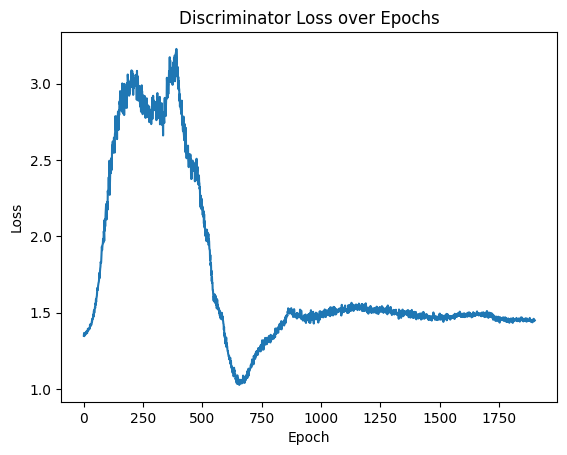

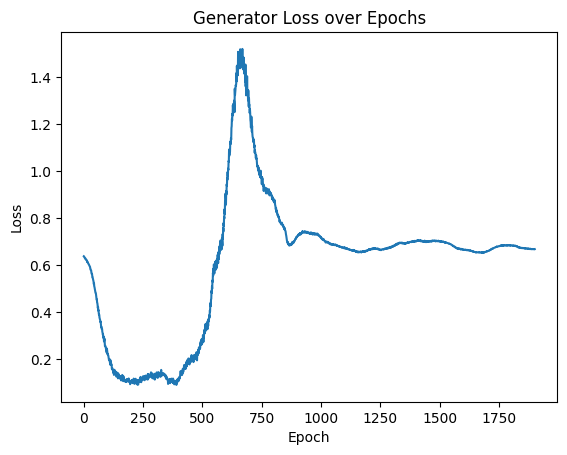

In [ ]:
import matplotlib.pyplot as plt

# Discriminator Loss Curve
plt.figure()
plt.plot(d_losses)
plt.title("Discriminator Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Generator Loss Curve
plt.figure()
plt.plot(g_losses)
plt.title("Generator Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


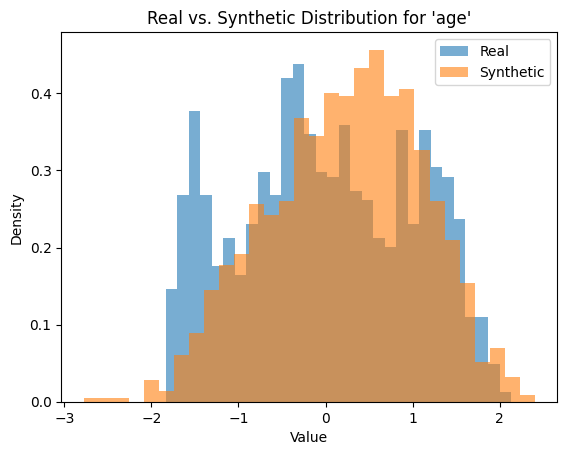

In [ ]:
# pick a feature, e.g. 'age'
real_vals   = X_train_processed['age']
synth_vals  = pd.Series(synth_df['age'])

plt.figure()
plt.hist(real_vals, bins=30, alpha=0.6, density=True)
plt.hist(synth_vals, bins=30, alpha=0.6, density=True)
plt.title("Real vs. Synthetic Distribution for 'age'")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend(["Real", "Synthetic"])
plt.show()


In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix
)


acc   = accuracy_score(y_test, y_pred)
prec  = precision_score(y_test, y_pred, zero_division=0)
rec   = recall_score(y_test, y_pred)
f1    = f1_score(y_test, y_pred)
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")

print("=== Classification Report ===")
print(classification_report(y_test, y_pred, zero_division=0))

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

Accuracy : 0.8555
Precision: 0.5357
Recall   : 0.7059
F1 Score : 0.6091
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       448
           1       0.54      0.71      0.61        85

    accuracy                           0.86       533
   macro avg       0.74      0.79      0.76       533
weighted avg       0.88      0.86      0.86       533

=== Confusion Matrix ===
[[396  52]
 [ 25  60]]


In [ ]:
import numpy as np
print("Train class counts (real + synth):", np.bincount(y_aug.astype(int)))
print("Train class counts (real only):",    np.bincount(y_train.values))


Train class counts (real + synth): [1666  820]
Train class counts (real only): [1045  198]


##Model Training and Testing using Logistic Regression (Baseline)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# #Use Logistic Regression with class_weight balanced to handle imbalance
# baseline_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
# baseline_model.fit(X_train_processed, y_train)

# #Evaluate on test data
# y_pred_baseline = baseline_model.predict(X_test_processed)
# print("Baseline Model Performance (Untouched Data):")
# print(classification_report(y_test, y_pred_baseline))
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred_baseline))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#Define the parameter grid.
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

#Create the logistic regression estimator with class weighting
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

#Use 5-fold cross-validation and focus on F1 score as the evaluation metric
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_processed, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation F1 Score:", grid_search.best_score_)

#Evaluate on the test set using the best estimator
best_logreg = grid_search.best_estimator_
y_pred = best_logreg.predict(X_test_processed)

from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation F1 Score: 0.5457808408950433
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.95      0.79      0.87       448
           1       0.42      0.79      0.55        85

    accuracy                           0.79       533
   macro avg       0.69      0.79      0.71       533
weighted avg       0.87      0.79      0.82       533

Confusion Matrix:
[[356  92]
 [ 18  67]]


In [ ]:
print(f'accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'precision: {precision_score(y_test, y_pred):.2f}')
print(f'recall: {recall_score(y_test, y_pred):.2f}')
print(f'f1: {f1_score(y_test, y_pred):.2f}')

accuracy: 0.79
precision: 0.42
recall: 0.79
f1: 0.55


##Incorporate Local Differential Privacy (LDP)

In [ ]:
def apply_ldp(data, epsilon=0.5, sensitivity=1.0):
  #noise scale = sensitivity/epsilon
  scale = sensitivity / epsilon
  noise = np.random.laplace(loc=0.0, scale=scale, size=data.shape)
  return data + noise

In [ ]:
def apply_gaussian_noise(data, epsilon=0.5, sensitivity=1.0):
  scale = sensitivity / epsilon
  noise = np.random.normal(loc=0.0, scale=scale, size=data.shape)
  return data + noise

In [ ]:
X_train_gaussian = pd.DataFrame(apply_gaussian_noise(X_train_processed.values, epsilon=0.5, sensitivity=1.0), columns=X_train_processed.columns, index=X_train_processed.index)
X_test_gaussian = pd.DataFrame(apply_gaussian_noise(X_test_processed.values, epsilon=0.5, sensitivity=1.0), columns=X_test_processed.columns, index=X_test_processed.index)

In [ ]:
#Apply LDP to the processed training and test data
X_train_ldp = pd.DataFrame(
    apply_ldp(X_train_processed.values, epsilon=0.5, sensitivity=1.0),
    columns=X_train_processed.columns,
    index=X_train_processed.index
)
X_test_ldp = pd.DataFrame(
    apply_ldp(X_test_processed.values, epsilon=0.5, sensitivity=1.0),
    columns=X_test_processed.columns,
    index=X_test_processed.index
)

In [ ]:
#Retrain best logistic regression model on LDP data
best_logreg.fit(X_train_gaussian, y_train)
y_pred_gaussian = best_logreg.predict(X_test_gaussian)
print("Classification Report (Gaussian Logistic Regression):")
print(classification_report(y_test, y_pred_gaussian))

Classification Report (Gaussian Logistic Regression):
              precision    recall  f1-score   support

           0       0.90      0.70      0.79       448
           1       0.27      0.59      0.37        85

    accuracy                           0.68       533
   macro avg       0.59      0.65      0.58       533
weighted avg       0.80      0.68      0.72       533



In [ ]:
#Retrain best logistic regression model on LDP data
best_logreg.fit(X_train_ldp, y_train)
y_pred_ldp = best_logreg.predict(X_test_ldp)
print("Classification Report (LDP Logistic Regression):")
print(classification_report(y_test, y_pred_ldp))

Classification Report (LDP Logistic Regression):
              precision    recall  f1-score   support

           0       0.87      0.62      0.72       448
           1       0.21      0.53      0.30        85

    accuracy                           0.60       533
   macro avg       0.54      0.57      0.51       533
weighted avg       0.77      0.60      0.65       533



In [ ]:
print(f'accuracy: {accuracy_score(y_test, y_pred_gaussian):.2f}')
print(f'precision: {precision_score(y_test, y_pred_gaussian):.2f}')
print(f'recall: {recall_score(y_test, y_pred_gaussian):.2f}')
print(f'f1: {f1_score(y_test, y_pred_gaussian):.2f}')

accuracy: 0.68
precision: 0.27
recall: 0.59
f1: 0.37


In [ ]:
print(f'accuracy: {accuracy_score(y_test, y_pred_ldp):.2f}')
print(f'precision: {precision_score(y_test, y_pred_ldp):.2f}')
print(f'recall: {recall_score(y_test, y_pred_ldp):.2f}')
print(f'f1: {f1_score(y_test, y_pred_ldp):.2f}')

accuracy: 0.60
precision: 0.21
recall: 0.53
f1: 0.30


##Differences in LDP vs non-LDP

In [ ]:
def plot_feature_distribution(feature, original, noisy):
    plt.figure(figsize=(8, 4))
    plt.hist(original[feature], bins=30, alpha=0.5, label='Original', color='b')
    plt.hist(noisy[feature], bins=30, alpha=0.5, label='Noisy')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()

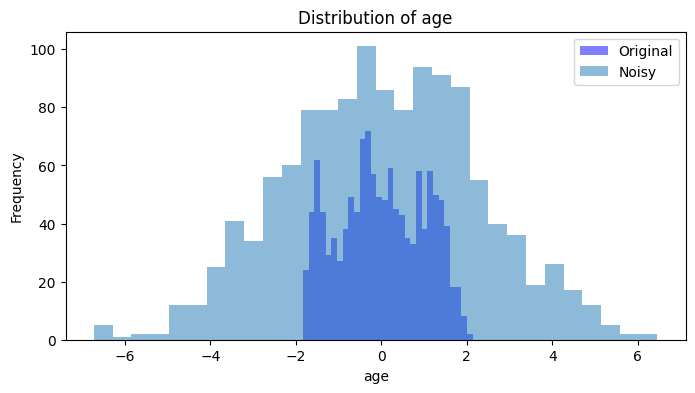

In [ ]:
plot_feature_distribution('age', X_train_processed, X_train_gaussian)

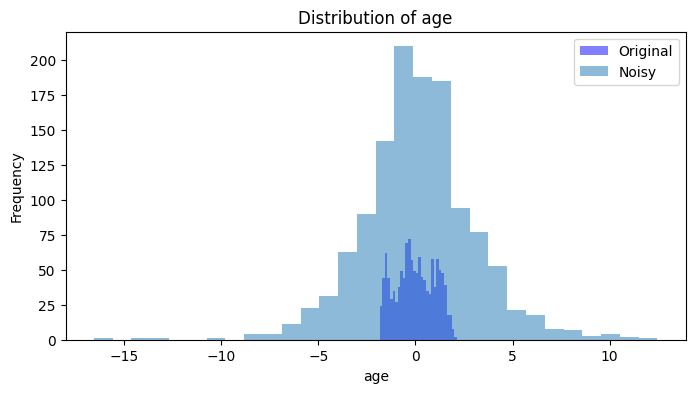

In [ ]:
plot_feature_distribution('age', X_train_processed, X_train_ldp)